<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [35]:
!pip install yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 31.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.8/114.8 kB 33.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 78.9 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: requests
    Found existing installation: requests 2.28.2
    Uninstalling requests-2.28.2:
      Successfully uninstalled requests-2.28.2
  Attempting uninstall: lxml
    Found existing installation: lxml 4.5.0
    Uninstalling lxml-4.5.0:
      Successfully uninstalled lxml-4.5.0


In [20]:
!pip install gtab

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 863.8/863.8 kB 53.3 MB/s eta 0:00:00


In [2]:
import sys, os
sys.path.append('../python')
from util import *
import pandas as pd

start="2010-01-01"
end="2019-12-31"
##############################################

# tickeranalysis = ticker_dict['energy'][0]
# tickerList = ticker_dict['energy']
# tickerList.remove(tickeranalysis)

In [3]:
import sys, os
sys.path.append('../python')
from util import *
import pandas as pd

In [4]:
DProcess = Data_Processing('2006-01-01', '2022-12-01', daily=True)

df_clean, train_df, valid_df, test_df = DProcess.cleansing_final1(fillna = True)

---

In [5]:
coverage_df = pd.read_csv('../data/coverage_dataframe.csv')[['PermID', 'Name', 'TRBCEconomicSector']]
coverage_df['PermID'] = coverage_df.PermID.astype(int)

In [6]:
unique_assets_df = pd.DataFrame({
    'Assets': train_df.Asset.unique()
})

unique_assets_df = pd.merge(unique_assets_df, coverage_df, how = 'left', left_on = 'Assets', right_on= 'PermID')
unique_assets_df = unique_assets_df.iloc[:, 1:]
unique_assets_df.columns = ['Assets', 'Firm Name', 'Economic Sector']

---

In [7]:
pd.DataFrame(np.unique(unique_assets_df['Economic Sector'], return_counts=True)).T

,0,1
0,Basic materials,16
1,Consumer cyclicals,24
2,Consumer non-cyclicals,16
3,Energy,7
4,Financials,24
5,Healthcare,5
6,Industrials,23
7,Real estate,3
8,Technology,10
9,Utilities,5


In [8]:
cons_cyclic_assets = unique_assets_df[unique_assets_df['Economic Sector'] == 'Consumer cyclicals'].Assets.tolist()

In [202]:
ts = unique_assets_df[unique_assets_df['Assets'].isin([4295885039,
 4295894168,
 4295894740,
 4295894972,
 4295894926,
 4295894471,
 4295894827])]['Firm Name'].unique().tolist()

---

In [9]:
sub_train_df = train_df[train_df.Asset.isin([4295885039,
 4295894168,
 4295894740,
 4295894972,
 4295894926,
 4295894471,
 4295894827])]

sub_test_df = test_df[test_df.Asset.isin([4295885039,
 4295894168,
 4295894740,
 4295894972,
 4295894926,
 4295894471,
 4295894827])]

sub_df = pd.concat([sub_train_df, sub_test_df]).reset_index(drop=True)

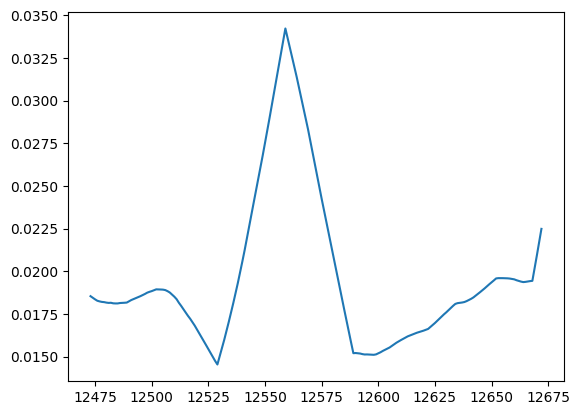

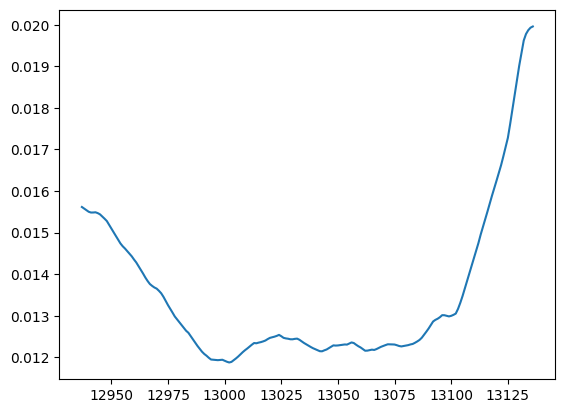

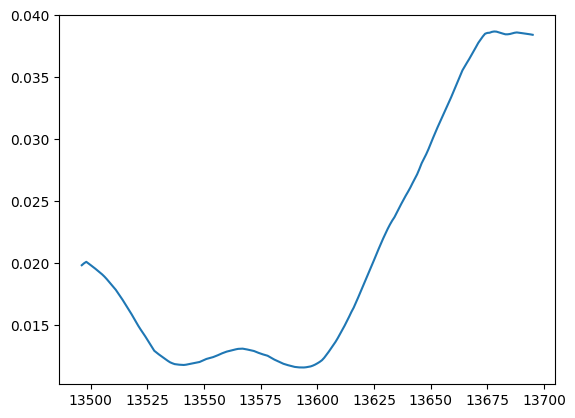

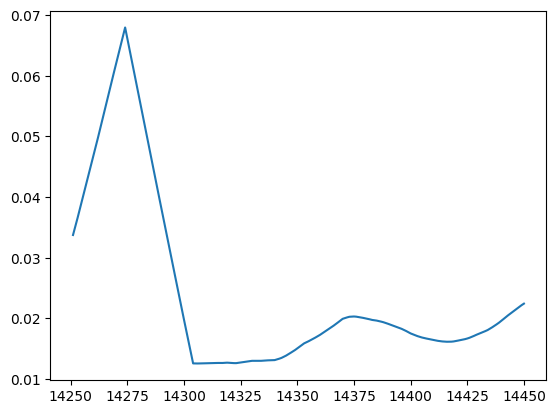

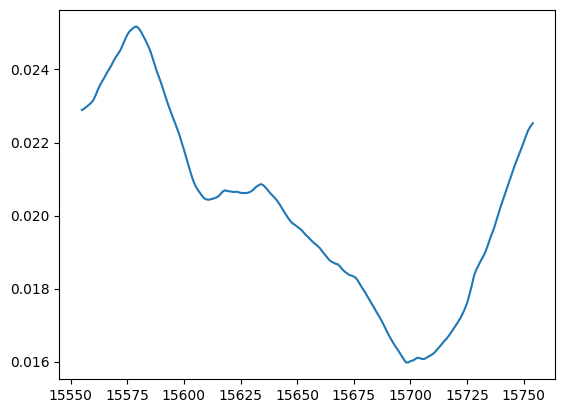

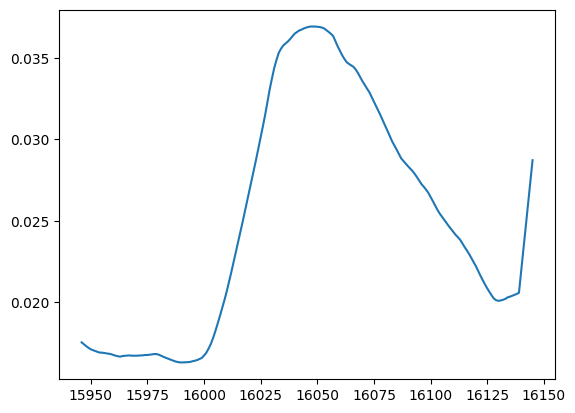

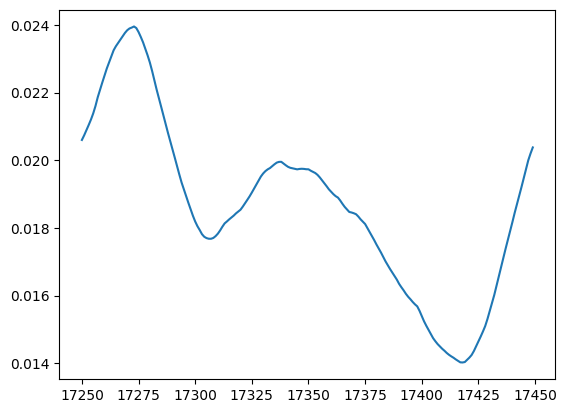

In [10]:
for a in sub_df.Asset.unique():
    
    plt.plot(sub_df[sub_df['Asset'] == a].iloc[-200:, -1])
    plt.show()

In [11]:
sub_df.head(5)

,date_key,Asset,Open,High,Low,Close,Return,V^CC,V^RS,V^YZ,col_merge,buzz,ESG,ESGCombined,ESGControversies,EnvironmentalPillar,GovernancePillar,SocialPillar,Community,EnvironmentalInnovation,Management,ProductResponsibility,Shareholders,Workforce,vol_series_daily,vol_series_weekly,vol_series_monthly
0,2008-07-14,4295894827,5.933874,6.027146,5.893900,5.907225,0.023865,0.027995,0.020708,0.024448,2008-07-13,373.0,71.0,70.0,69.0,80.0,66.0,71.0,87.0,83.0,81.0,97.0,30.0,97.0,NaN,NaN,NaN
1,2008-07-15,4295894827,5.978289,6.036029,5.822836,5.902783,-0.000752,0.027921,0.021032,0.024690,2008-07-14,384.0,71.0,70.0,68.0,80.0,66.0,71.0,90.0,82.0,80.0,95.0,30.0,97.0,0.024448,NaN,NaN
2,2008-07-16,4295894827,5.907225,5.964965,5.511929,5.640733,-0.044394,0.029173,0.022544,0.025845,2008-07-15,384.0,71.0,69.0,67.0,80.0,65.0,71.0,89.0,82.0,80.0,95.0,30.0,98.0,0.024690,NaN,NaN
3,2008-07-17,4295894827,5.667383,5.836161,5.614084,5.720681,0.014173,0.029272,0.022909,0.026135,2008-07-16,384.0,71.0,69.0,68.0,80.0,66.0,70.0,89.0,82.0,81.0,95.0,29.0,98.0,0.025845,NaN,NaN
4,2008-07-18,4295894827,5.716239,5.756213,5.423099,5.498605,-0.038820,0.030049,0.023455,0.026620,2008-07-17,384.0,71.0,69.0,68.0,80.0,67.0,70.0,89.0,82.0,83.0,95.0,29.0,98.0,0.026135,NaN,NaN


In [12]:
sub_df = sub_df.dropna()

In [13]:
sub_df = sub_df[['Asset', 'vol_series_daily', 'vol_series_weekly', 'vol_series_monthly', 'V^YZ']]

In [177]:
# import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow import keras
import gtab

past_history = 60
forward_look = 1
train_test_split = 0.8
batch_size = 30
epochs = 50
steps_per_epoch = 200
validation_steps = 50
verbose = 0
infer_train = True
depth = 0
naive = False
values = 200
plot_values = True
plot_bot = True
tickerSymbolList = None
sameTickerTestTrain = True

In [178]:
# ticker_dict, tickerSymbols = get_categorical_tickers()

In [179]:
sub_df[sub_df.Asset == tickerSymbol]

,Asset,vol_series_daily,vol_series_weekly,vol_series_monthly,V^YZ
9204,4295885039,0.009245,0.009215,0.009723,0.009378
9205,4295885039,0.009378,0.009226,0.009711,0.009354
9206,4295885039,0.009354,0.009227,0.009695,0.009475
9207,4295885039,0.009475,0.009241,0.009689,0.009658
9208,4295885039,0.009658,0.009330,0.009686,0.009763
...,...,...,...,...,...
17445,4295885039,0.021318,0.021419,0.019468,0.021504
17446,4295885039,0.021504,0.021410,0.019734,0.021458
17447,4295885039,0.021458,0.021396,0.019999,0.020705
17448,4295885039,0.020705,0.021271,0.020199,0.020511


In [180]:
# y_all = []
# tickerSymbolList = tickerSymbols
# for tickerSymbol in tickerSymbolList:
#     tickerData = yf.Ticker(tickerSymbol)
#     tickerDf = yf.download(tickerSymbol, start=start, end=end)
#     tickerDf = tickerDf['Adj Close']
#     data = tickerDf
#     y_all.append(data.values)
#     maxTestValues = len(data.values) - int(len(data.values) * train_test_split)
    
y_all = []
# tickerSymbolList = tickerSymbols
for tickerSymbol in sub_df.Asset.unique():
    tickerDf = sub_df[sub_df.Asset == tickerSymbol].drop('Asset', axis=1)
    data = tickerDf
    y_all.append(data.values)
    maxTestValues = len(data.values) - int(len(data.values) * train_test_split)

In [301]:
def data_preprocess(dataset, iStart, iEnd, sHistory, forward_look=1):
    '''
    Preprocess the data to make either the test set or the train set
    :param dataset: np.array of time-series data
    :param iStart: int of index start
    :param iEnd: int of index end
    :param sHistory: int number of days in history that we need to look at
    :param forward_look: int of number of days in the future that needs to predicted
    :return: returns a list of test/train data
    '''
    data = []
    target = []
    iStart += sHistory
    if iEnd is None:
        iEnd = len(dataset) - forward_look + 1
    for i in range(iStart, iEnd):
        indices = range(i - sHistory, i)  # set the order
        if forward_look > 1:
            fwd_ind = range(i, i + forward_look)
            fwd_entity = np.asarray([])
            fwd_entity = np.append(fwd_entity, dataset[fwd_ind])
        reshape_entity = np.asarray([])
        reshape_entity = np.append(reshape_entity, dataset[
            indices][:, :-1])  # Comment this out if there are multiple identifiers in the feature vector
        # print(dataset[indices][:, :-1])
        data.append(np.reshape(reshape_entity, (sHistory, 3)))  #
        if forward_look > 1:
            target.append(np.reshape(fwd_entity, (forward_look, 3)))
        else:
            target.append(dataset[i][-1])
    data = np.array(data)
    target = np.array(target)
    
    return data, target

In [302]:
# y_size = 0
# if sameTickerTestTrain == True: # For each ticker, split data into train and test set. Test and validation are the same
#     xtrain = []
#     ytrain = []
#     xtest = []
#     ytest = []
#     for y in y_all:
#         training_size = int(y.size * train_test_split)
#         training_mean = y[:training_size].mean()  # get the average
#         training_std = y[:training_size].std()  # std = a measure of how far away individual measurements tend to be from the mean value of a data set.
#         y = (y - training_mean) / training_std  # prep data, use mean and standard deviation to maintain distribution and ratios
#         data, target = data_preprocess(y, 0, training_size, past_history, forward_look = forward_look)
#         xtrain.append(data)
#         ytrain.append(target)
#         data, target = data_preprocess(y, training_size, None, past_history, forward_look = forward_look)
#         xtest.append(data)
#         ytest.append(target)
#         y_size += y.size

#     xtrain = np.concatenate(xtrain)
#     ytrain = np.concatenate(ytrain)
#     xtest = np.concatenate(xtest)
#     ytest = np.concatenate(ytest)
#     xt = xtest.copy()
#     yt = ytest.copy()

In [303]:
y_size = 0
train_test_split = .7
validation_split = .1
xtrain, xtest, xt = [], [], []
ytrain, ytest, yt = [], [], []

for y in y_all:
    training_size = int(len(y) * train_test_split) - 1 # adding a new rule - 1 to make sure not make it out of index.
    validation_size = int(len(y) * validation_split)

    # training preprocess
    training_mean = y[:training_size].mean(axis=0)  # get the average
    training_std = y[:training_size].std(axis=0)  # std = a measure of how far away individual measurements tend to be from the mean value of a data set.
    y = (y - training_mean) / training_std  # prep data, use mean and standard deviation to maintain distribution and ratios
    
    data, target = data_preprocess(y, 0, training_size, past_history, forward_look=forward_look)

    xtrain.append(data)
    ytrain.append(target)
    y_size += len(y)

    # validation preprocess
    y_valid = y[training_size:]
    y_valid = (y_valid - training_mean) / training_std

    data, target = data_preprocess(y_valid, 0, validation_size, past_history, forward_look=forward_look)

    xtest.append(data)
    ytest.append(target)

    # test preprocess
    data, target = data_preprocess(y_valid, validation_size, None, past_history, forward_look=forward_look)

    xt.append(data)
    yt.append(target)


xtrain = np.concatenate(xtrain)
ytrain = np.concatenate(ytrain)

xtest = np.concatenate(xtest)
ytest = np.concatenate(ytest)

In [304]:
def create_p_test_train():
    '''
    Prepare shuffled train and test data
    '''
    BATCH_SIZE = batch_size
    BUFFER_SIZE = y_size
    p_train = tf.data.Dataset.from_tensor_slices((xtrain, ytrain))
    p_train = p_train.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE, drop_remainder=True).repeat()
    p_test = tf.data.Dataset.from_tensor_slices((xtest, ytest))
    p_test = p_test.batch(BATCH_SIZE).repeat()
    
    return p_train, p_test

In [305]:
p_train, p_test = create_p_test_train()

In [306]:
def model_LSTM():
    '''
    Create the stacked LSTM model and train it using the shuffled train set
    '''
    epochs = 50
    steps_per_epoch = 200
    validation_steps = 50
    verbose = 0
    naive = True
    depth = 0
    
    model = tf.keras.models.Sequential()
    if naive:
        model.add(tf.keras.layers.LSTM(20, input_shape = xtrain.shape[-2:]))
    else:
        model.add(tf.keras.layers.LSTM(20, return_sequences=True, input_shape = xtrain.shape[-2:]))
    for i in range(depth):
        model.add(tf.keras.layers.LSTM(20, return_sequences=True))
    if naive is False:
        model.add(tf.keras.layers.LSTM(20))
    model.add(tf.keras.layers.Dense(forward_look))

    model.compile(optimizer='Adam',
                    loss='mse', metrics=['mse'])
    p_train, p_test = create_p_test_train()
    hist = model.fit(p_train, epochs = epochs, steps_per_epoch = steps_per_epoch,
                validation_data = p_test, validation_steps = validation_steps,
                verbose = verbose)
    
    return hist, model

In [307]:
inter_train = False

In [308]:
def infer_values(xtest, ytest, ts = None):
        '''
        Infer values by using the test set
        :param xtest: test dataset
        :param ytest: actual value dataset
        :param ts: tikcer symbol
        :return: model variables that store predicted data
        '''
        pred = []
        pred_update = []
        usetest = xtest.copy()
        if infer_train:
            pred_train = []
            pred_update_train = []
            usetest_train = xtrain.copy()
        for i in range(200):
            y_pred = model.predict(xtest[i,:,:].reshape(1,xtest.shape[1],xtest.shape[2]))[0][:]
            y_pred_update = model.predict(usetest[i,:,:].reshape(1,xtest.shape[1],xtest.shape[2]))[0][:]
            pred.append(y_pred)
            pred_update.append(y_pred_update)
            # usetest[np.linspace(i+1,i+past_history-1,past_history-1,dtype=int),np.linspace(past_history-2,0,past_history-1,dtype=int),:] =  y_pred_update[0]
            if infer_train:
                y_pred_train = model.predict(xtrain[i, :, :].reshape(1, xtrain.shape[1], xtrain.shape[2]))[0][:]
                y_pred_update_train = \
                model.predict(usetest_train[i, :, :].reshape(1, xtrain.shape[1], xtrain.shape[2]))[0][:]
                pred_train.append(y_pred_train)
                pred_update_train.append(y_pred_update_train)
                usetest_train[np.linspace(i + 1, i + past_history - 1, past_history - 1, dtype=int),
                np.linspace(past_history - 2, 0, past_history - 1, dtype=int), :] = y_pred_update_train[0]
        pred = np.array(pred)
        pred_update = np.array(pred_update)
        RMS_error = hist.history['val_mse'][-1]
        RMS_error_train = hist.history['mse'][-1]
        if infer_train:
            pred = np.array(pred)
            pred_update = np.array(pred_update)
        if forward_look > 1:
            RMS_error_update = (np.mean(((ytest[:values - 1, 0, 0] - pred_update[1:, 0]) / (
                ytest[:values - 1, 0, 0])) ** 2)) ** 0.5 / batch_size
            if infer_train:
                RMS_error_update_train = (np.mean(
                    ((ytrain[:values - 1, 0, 0] - pred_update_train[1:, 0]) / (
                        ytrain[:values - 1, 0, 0])) ** 2)) ** 0.5 / batch_size
        else:
            RMS_error_update = (np.mean(
                ((ytest[:values - 1] - pred_update[1:]) / (
                ytest[:values - 1])) ** 2)) ** 0.5 / batch_size
            if infer_train:
                RMS_error_update_train = (np.mean(((ytrain[:values - 1] - pred_update_train[1:]) / (
                    ytrain[:values - 1])) ** 2)) ** 0.5 / batch_size
                
        return pred, pred_update, RMS_error_update, RMS_error

In [309]:
hist, model = model_LSTM()

In [310]:
for i, name in enumerate(ts):
    
    pred, pred_update, RMS_error_update, RMS_error = infer_values(xt[i], yt[i], ts[i])
    break

1/1 [==============================] - 0s 26ms/step


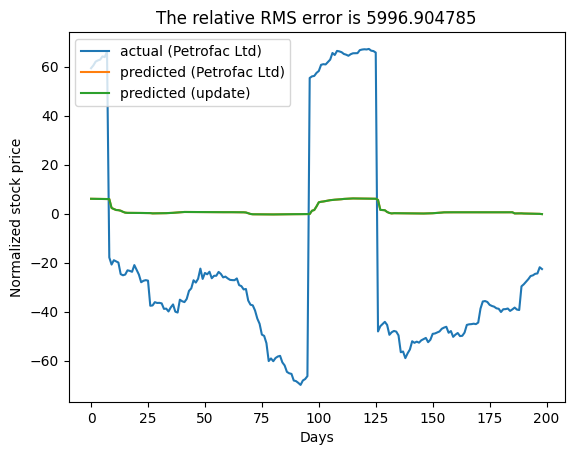

In [311]:
plt.plot(yt[0][:values-1],label='actual (%s)'%ts[0])
plt.plot(pred[1:],label='predicted (%s)'%ts[0])
plt.plot(pred_update[1:],label='predicted (update)')
plt.xlabel("Days")
plt.ylabel("Normalized stock price")
plt.title('The relative RMS error is %f' % RMS_error)
plt.legend()
# plt.savefig('../images/MultiStock_prediction_%d_%d_%d_%d_%s.png'%(
# depth,int(naive), past_history, forward_look, ts))

# Start Fresh

In [1]:
import sys, os
# sys.path.append('../../code-directory/stock_price_prediction/python/')
sys.path.append('../python/')

In [2]:
from LSTM_utilities import *

CVX downloading...
[*********************100%***********************]  1 of 1 completed
SHEL downloading...
[*********************100%***********************]  1 of 1 completed
PTR.L downloading...
[*********************100%***********************]  1 of 1 completed
TTE downloading...
[*********************100%***********************]  1 of 1 completed
BP downloading...
[*********************100%***********************]  1 of 1 completed
PBR downloading...
[*********************100%***********************]  1 of 1 completed
^GSPC downloading...
[*********************100%***********************]  1 of 1 completed
SLB downloading...
[*********************100%***********************]  1 of 1 completed
VLO downloading...
[*********************100%***********************]  1 of 1 completed
XOM downloading...
[*********************100%***********************]  1 of 1 completed
1/1 [==============================] - 0s 23ms/step
The relative test RMS error is 0.006450
The relative test RMS er

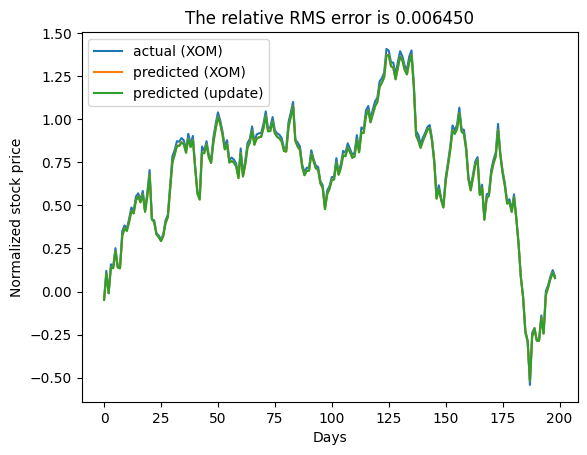

<Figure size 640x480 with 0 Axes>

In [3]:
'''
Outil initializers of the class the can be mentioned along with the default values:
past_history = 60       # number of days in the past you want to look at
forward_look = 1        # number of days forward that you want to predict
train_test_split = 0.8
batch_size = 30
epochs = 50
steps_per_epoch = 200   #
validation_steps = 50    # Steps taken while validating over the dev set
verbose = 0             # Whether you want tensorflow to print out the training gunk
depth = 1               # Depth of the stacked LSTM (I could get rid of naive in the future)
naive = False           # Should've called it a better name but it just refers to one LSTM
values = 200            # Future days that you want to plot for (computed one day at a time)
'''


ticker_dict, tickerSymbols = get_categorical_tickers()
start="2010-01-01"
end="2019-12-31"
##############################################
tickeranalysis = ticker_dict['energy'][0]
tickerList = ticker_dict['energy']
tickerList.remove(tickeranalysis)

LSTM_1 = LSTM_Model_MS(tickerSymbol = tickeranalysis, start = start, end = end, depth = 0, naive = True,
                       tickerSymbolList = tickerList, sameTickerTestTrain = False)
LSTM_1.full_workflow_and_plot()

---

# Testing new Class

In [298]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow import keras
import gtab

def get_categorical_tickers():
    '''
    This Function returns a dictionary of tickers for different industry types
    :return:
    ticker_dict: Dictionary of 9 different industry types with over 8 tickers each
    tickerSymbols: Set of three tickers
    '''
    ticker_dict = {}
    all_tickers = []
    ticker_dict['energy'] = ['XOM', 'CVX', 'SHEL', 'PTR.L', 'TTE', 'BP', 'PBR', '^GSPC', 'SLB', 'VLO']
    ticker_dict['materials'] = ['BHP', 'LIN', 'RIO', 'DD', 'SHW', 'CTA-PB', 'APD']
    ticker_dict['industrials'] = ['UPS', 'HON', 'LMT', 'BA', 'GE', 'MMM', 'RTX', 'CAT', 'WM', 'ABB', 'ETN', 'EMR',
                                  'FDX', 'TRI']
    ticker_dict['utilities'] = ['NEE', 'DUK', 'NGG', 'AEP', 'XEL','AWK' ,'ETR', 'PCG']
    ticker_dict['healthcare'] = ['UNH', 'JNJ', 'PFE', 'NVO', 'TMO', 'MRK', 'AZN', 'NVS', 'DHR', 'AMGN', 'CVS', 'GSK',
                                 'ZTS', 'GILD']
    ticker_dict['financials'] = ['BRK-A', 'V', 'JPM', 'BAC', 'MA', 'WFC', 'C-PJ', 'MS', 'RY', 'AXP']
    ticker_dict['discretionary'] = ['AMZN', 'TSLA', 'HD', 'BABA', 'TM', 'NKE', 'MCD', 'SBUX', 'F', 'MAR', 'GM', 'ORLY',
                                    'LILI', 'HMC', 'CMG', 'HLT']
    ticker_dict['staples'] = ['WMT', 'PG', 'KO', 'COST', 'PEP', 'BUD', 'UL', 'TGT', 'MDLZ', 'CL', 'DG', 'KHC', 'KDP',
                              'HSY']
    ticker_dict['IT'] = ['AAPL', 'MSFT', 'TSM', 'NVDA', 'AVGO', 'CSCO', 'ORCL', 'ACN', 'ADBE', 'INTC', 'CRM', 'TXN',
                         'QCOM', 'AMD', 'IBM', 'SONY', 'AMAT', 'INFY', 'ADI', 'MU', 'LRCX']
    ticker_dict['communication'] = ['GOOG', 'FB', 'DIS', 'VZ', 'CMCSA', 'TMUS', 'T', 'NFLX', 'SNAP', 'VOD', 'BAIDU',
                                    'TWTR', 'EA']
    ticker_dict['estate'] = ['PLD', 'AMT', 'CCI', 'EQIX', 'SPG', 'DLR', 'WELL', 'EQR', 'AVB', 'WY', 'INVH', 'MAA']
    ticker_keys = []
    for key in ticker_dict.keys():
        ticker_keys.append(key)
        all_tickers.append(ticker_dict[key])
    ticker_dict['all'] = all_tickers
    tickerSymbols = ['BRK-A', 'GOOG', 'MSFT']
    return ticker_dict, tickerSymbols

def get_company_names():
    '''
    Get a dictionary of search strings corresponding to different ticker labels
    :return:
    ticker_dict: Dictionary of search strings given a stock ticker
    '''
    ticker_dict = {}
    all_tickers = []
    ticker_dict['energy'] = {'XOM': 'Exxon Mobil', 'CVX': 'Chevron', 'SHEL': 'Shell', 'PTR': 'PetroChina',
                             'TTE': 'TotalEnergies', 'BP': 'BP', 'PBR': 'Petroleo Brasileiro',
                             'SNP': 'China Petroleum', 'SLB': 'Schlumberger', 'VLO': 'Valero'}
    '''
    ticker_dict['materials'] = ['BHP', 'LIN', 'RIO', 'DD', 'SHW', 'CTA-PB', 'APD']
    ticker_dict['industrials'] = ['UPS', 'HON', 'LMT', 'BA', 'GE', 'MMM', 'RTX', 'CAT', 'WM', 'ABB', 'ETN', 'EMR',
                                  'FDX', 'TRI']
    ticker_dict['utilities'] = ['NEE', 'DUK', 'NGG', 'AEP', 'XEL','AWK' ,'ETR', 'PCG']
    ticker_dict['healthcare'] = ['UNH', 'JNJ', 'PFE', 'NVO', 'TMO', 'MRK', 'AZN', 'NVS', 'DHR', 'AMGN', 'CVS', 'GSK',
                                 'ZTS', 'GILD']
    ticker_dict['financials'] = ['BRK-A', 'V', 'JPM', 'BAC', 'MA', 'WFC', 'C-PJ', 'MS', 'RY', 'AXP']
    ticker_dict['discretionary'] = ['AMZN', 'TSLA', 'HD', 'BABA', 'TM', 'NKE', 'MCD', 'SBUX', 'F', 'MAR', 'GM', 'ORLY',
                                    'LILI', 'HMC', 'CMG', 'HLT']
    ticker_dict['staples'] = ['WMT', 'PG', 'KO', 'COST', 'PEP', 'BUD', 'UL', 'TGT', 'MDLZ', 'CL', 'DG', 'KHC', 'KDP',
                              'HSY']
    ticker_dict['IT'] = ['AAPL', 'MSFT', 'TSM', 'NVDA', 'AVGO', 'CSCO', 'ORCL', 'ACN', 'ADBE', 'INTC', 'CRM', 'TXN',
                         'QCOM', 'AMD', 'IBM', 'SONY', 'AMAT', 'INFY', 'ADI', 'MU', 'LRCX']
    ticker_dict['communication'] = ['GOOG', 'FB', 'DIS', 'VZ', 'CMCSA', 'TMUS', 'T', 'NFLX', 'SNAP', 'VOD', 'BAIDU',
                                    'TWTR', 'EA']
    ticker_dict['estate'] = ['PLD', 'AMT', 'CCI', 'EQIX', 'SPG', 'DLR', 'WELL', 'EQR', 'AVB', 'WY', 'INVH', 'MAA']
    ticker_keys = []
    for key in ticker_dict.keys():
        ticker_keys.append(key)
        all_tickers.append(ticker_dict[key])
    ticker_dict['all'] = all_tickers
    '''
    return ticker_dict

def cross_corr(a,b):
    '''
    Compute the cross-correlation between
    :param a: Time-series data of first stock
    :param b: Time-series data of second stock
    :return: Cross-correlation of the two stocks that are input
    '''
    return (a*b).sum()/((a**2).sum()*(b**2).sum())**0.5

def get_tick_values(tickerSymbol, start, end):
    '''
    Function to extract the time series data
    :param tickerSymbol: String of stock ticker
    :param start: String of starting date of the time-series data
    :param end: String of ending date of the time-series data
    :return: type(list): Time series data
    '''
    tickerData = yf.Ticker(tickerSymbol)
    tickerDf = yf.download(tickerSymbol, start=start, end=end)
    tickerDf = tickerDf['Adj Close']
    data = tickerDf
    return data.values

def get_control_vector(val):
    '''
    Returns the mask of day instances where stock purchase/sell decisions are to be made
    :param val: Input array of stock values
    :return: np.array of decisions maks labels (-2/0/2)
    '''
    return np.diff(np.sign(np.diff(val)))

def buy_and_sell_bot(val,controls):
    '''
    Returns the growth of investment over time as function of the input decision mask and the stock values
    :param val: np.array of the actual stock value over time
    :param controls: np.array of the control mask to make purchase/sell decisions
    :return: np.array of percentage growth value of the invested stock
    '''
    inv = []
    curr_val = 100
    inds = np.where(controls)[0]
    buy_inds = np.where(controls>0)[0]
    sell_inds = np.where(controls<0)[0]
    max_limit = sell_inds[-1] if sell_inds[-1]>buy_inds[-1] else buy_inds[-1]
    for i in range(buy_inds[0]+2):
        inv.append(curr_val)
    for i in range(buy_inds[0],max_limit+1):
        if controls[i]>0:
            buy_val = val[i+1]
        elif controls[i]<0:
            sell_val = val[i+1]
            curr_val = curr_val*sell_val/buy_val
        inv.append(curr_val)
    if max_limit+1!=len(controls):
        for i in range(len(controls)-max_limit-1):
            inv.append(curr_val)
    return inv

class LSTM_Model_MS_II():
    '''
    '''

    def __init__(self, train_df, test_df, start, end,
                 
                 sector = 'Consumer cyclicals', features = 'm1', train_test_split = 0.7, 
                 validation_split = .1,

                 past_history = 60, forward_look = 1,  batch_size = 30,
                 epochs = 50, steps_per_epoch = 200, validation_steps = 50, verbose = 0, infer_train = True,
                 depth = 1, naive = False, values = 100, plot_values = True, plot_bot = True,
                 tickerSymbolList = None, sameTickerTestTrain = True):
        
        '''
        Initialize parameters for the class
        :param tickerSymbol: String of Ticker symbol to train on
        :param start: String of start date of time-series data
        :param end: String of end date of time-series data
        :param past_history: Int of past number of days to look at
        :param forward_look: Int of future days to predict at a time
        :param train_test_split: Float of fraction train-test split
        :param batch_size: Int of mini-batch size
        :param epochs: Int of total number of epochs in training
        :param steps_per_epoch: Int for total number of mini-batches to run over per epoch
        :param validation_steps: Int of total number of steps to use while validating with the dev set
        :param verbose: Int to decide to print training stage results
        :param infer_train: Flag to carry out prediction on training set
        :param depth: Int to decide depth of stacked LSTM
        :param naive: Flag for deciding if we need a Vanila model
        :param values: Int for number of days to predict for by iteratively updating the time-series histroy # adjusting the test set to 100
        :param plot_values: Flag to plot
        :param plot_bot: Flag to plot the investment growth by the decision making bot
        :param tickerSymbolList: List of tickers to train the model on
        :param sameTickerTestTrain: Falg, for model containing the ticker on which predictions are made
        '''

        self.train_df = train_df
        self.test_df = test_df
        self.sector = sector
        self.features = features
        self.validation_split = validation_split

        self.start = start
        self.end = end
        self.past_history = past_history
        self.forward_look = forward_look
        self.train_test_split = train_test_split
        self.batch_size = batch_size
        self.epochs = epochs
        self.steps_per_epoch = steps_per_epoch
        self.validation_steps = validation_steps
        self.verbose = verbose
        self.values = values
        self.depth = depth
        self.naive = naive
        self.custom_loss = False
        self.plot_values = plot_values
        self.plot_bot = plot_bot
        self.infer_train = infer_train
        self.sameTickerTestTrain = sameTickerTestTrain
        tf.random.set_seed(1728)

    def unique_sector(self):

        select_cols = ['PermID', 'Name', 'TRBCEconomicSector']
        rename_cols = ['Assets', 'Firm Name', 'Economic Sector']

        sector = self.sector
        train_df = self.train_df
        cover_df = pd.read_csv('../data/coverage_dataframe.csv')[select_cols]
        cover_df['PermID'] = cover_df.PermID.astype(int)

        info_df = pd.DataFrame({
            'Assets': train_df.Asset.unique()
        })

        info_df = pd.merge(info_df, cover_df, how = 'left', left_on = 'Assets', right_on= 'PermID')
        info_df = info_df.iloc[:, 1:]
        info_df.columns = rename_cols

        list_asset = info_df[info_df['Economic Sector'] == sector]['Assets'].tolist()
        self.ts = info_df[info_df['Economic Sector'] == sector]['Firm Name'].unique().tolist()

        self.info_df = info_df
        self.list_asset = list_asset

    def features_selections(self, features = 'm1', feature_version = 2):
        '''
        Current version #2 is the version after pre-processing and removing four columns and does not including the variables
        that come from HAR algorithms
        '''

        if features == 'm1':
            cols = ['vol_series_daily', 'vol_series_weekly', 'vol_series_monthly', 'V^YZ']

        elif features == 'm3':

            # version 1
            cols = [
                'buzz','ESG','ESGCombined','ESGControversies','EnvironmentalPillar','GovernancePillar','SocialPillar'
                            ,'CSRStrategy','Community','Emissions','EnvironmentalInnovation','HumanRights','Management','ProductResponsibility'
                            ,'ResourceUse','Shareholders','Workforce', 'vol_series_daily','vol_series_weekly','vol_series_monthly', 'V^YZ']
        
            if feature_version == 2:
                # version 2
                cols = ['buzz','ESG','ESGCombined','ESGControversies','EnvironmentalPillar','GovernancePillar','SocialPillar','Community',
                        'EnvironmentalInnovation','Management','ProductResponsibility','Shareholders','Workforce', 'V^YZ']
        
        else:
            cols = self.vif_check(feature_version = feature_version)

        self.col_lengths = len(cols)
        self.cols = cols

    def train_test_prep(self):

        self.unique_sector()
        self.features_selections(features = self.features, feature_version = 2)
        print(self.cols)

        train_df = self.train_df
        test_df = self.test_df
        list_asset = self.list_asset
        train_test_split = self.train_test_split

        merge_df = pd.concat([train_df, test_df])
        merge_df = merge_df[merge_df.Asset.isin(list_asset)].dropna()

        y_all = []
        for id in list_asset:
            data = merge_df[merge_df.Asset == id][self.cols]
            y_all.append(data.values)
            maxTestValues = len(data.values) - int(len(data.values) * train_test_split)

        print('train_test_prep() function is done')
        self.y_all = y_all
    
    def data_preprocess(self, dataset, iStart, iEnd, sHistory, forward_look=1):
        '''
        Preprocess the data to make either the test set or the train set
        :param dataset: np.array of time-series data
        :param iStart: int of index start
        :param iEnd: int of index end
        :param sHistory: int number of days in history that we need to look at
        :param forward_look: int of number of days in the future that needs to predicted
        :return: returns a list of test/train data

        training=(y, 0, validation_size, ...), 
        test=(y, validation_size, None, ...) means 
        it will start from the middle until the last row of observation.

        '''
        data = []
        target = []
        iStart += sHistory
        if iEnd is None:
            iEnd = len(dataset) - forward_look + 1
        # print(iEnd)
        for i in range(iStart, iEnd): 
            indices = range(i - sHistory, i)  # set the order
            if forward_look > 1:
                fwd_ind = range(i, i + forward_look)
                fwd_entity = np.asarray([])
                fwd_entity = np.append(fwd_entity, dataset[fwd_ind])
            reshape_entity = np.asarray([])
            reshape_entity = np.append(reshape_entity, dataset[
                indices][:, :-1])  # Comment this out if there are multiple identifiers in the feature vector
            
            # col length - 1 reduce total column from 
            data.append(np.reshape(reshape_entity, (sHistory, self.col_lengths - 1))) 
            if forward_look > 1:
                target.append(np.reshape(fwd_entity, (forward_look, self.col_lengths - 1)))
            else:
                target.append(dataset[i][-1])
        data = np.array(data)
        target = np.array(target)
        return data, target

    def prepare_test_train(self):
        '''
        Create the dataset from the extracted time-series data
        '''

        self.xtrain, self.xtest, self.xt = [], [], []
        self.ytrain, self.ytest, self.yt = [], [], []
        self.y_size = 0

        for y in self.y_all:
            training_size = int(len(y) * self.train_test_split) - 1 # adding a new rule - 1 to make sure not make it out of index.
            validation_size = int(len(y) * self.validation_split)

            # training preprocess
            training_mean = y[:training_size].mean(axis=0)  # get the average
            training_std = y[:training_size].std(axis=0)  # std = a measure of how far away individual measurements tend to be from the mean value of a data set.
            y = (y - training_mean) / training_std  # prep data, use mean and standard deviation to maintain distribution and ratios
            data, target = self.data_preprocess(y, 0, training_size, self.past_history, forward_look=self.forward_look)

            self.xtrain.append(data)
            self.ytrain.append(target)
            self.y_size += len(y)

            # validation preprocess
            y_valid = y[training_size:]
            y_valid = (y_valid - training_mean) / training_std
            data, target = self.data_preprocess(y_valid, 0, validation_size, self.past_history, forward_look=self.forward_look)

            self.xtest.append(data)
            self.ytest.append(target)

            # test prep
            data, target = self.data_preprocess(y_valid, validation_size, None, self.past_history, forward_look=self.forward_look)

            self.xt.append(data)
            self.yt.append(target)


        self.xtrain = np.concatenate(self.xtrain)
        self.ytrain = np.concatenate(self.ytrain)
        
        self.xtest = np.concatenate(self.xtest)
        self.ytest = np.concatenate(self.ytest)

        print('prepare_test_train() is done')

    def create_p_test_train(self):
        '''
        Prepare shuffled train and test data
        '''
        BATCH_SIZE = self.batch_size
        BUFFER_SIZE = self.y_size
        p_train = tf.data.Dataset.from_tensor_slices((self.xtrain, self.ytrain))
        self.p_train = p_train.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE, drop_remainder=True).repeat()
        p_test = tf.data.Dataset.from_tensor_slices((self.xtest, self.ytest))
        self.p_test = p_test.batch(BATCH_SIZE).repeat()

    def model_LSTM(self):
        '''
        Create the stacked LSTM model and train it using the shuffled train set
        '''
        self.model = tf.keras.models.Sequential()
        if self.naive:
            self.model.add(tf.keras.layers.LSTM(20, input_shape = self.xtrain.shape[-2:]))
        else:
            self.model.add(tf.keras.layers.LSTM(20, return_sequences=True, input_shape = self.xtrain.shape[-2:]))
        for i in range(self.depth):
            self.model.add(tf.keras.layers.LSTM(20, return_sequences=True))
        if self.naive is False:
            self.model.add(tf.keras.layers.LSTM(20))
        self.model.add(tf.keras.layers.Dense(self.forward_look))

        self.model.compile(optimizer='Adam',
                      loss='mse', metrics=['mse'])
        self.create_p_test_train()
        self.hist = self.model.fit(self.p_train, epochs = self.epochs, steps_per_epoch = self.steps_per_epoch,
                  validation_data = self.p_test, validation_steps = self.validation_steps,
                  verbose = self.verbose)
        
        hist = self.hist
        model = self.model

        print('Running model_LSTM() is done')

        return hist, model
    
    def infer_values(self, xtest, ytest, ts = None):
        '''
        Infer values by using the test set
        :param xtest: test dataset
        :param ytest: actual value dataset
        :param ts: tikcer symbol
        :return: model variables that store predicted data
        '''
        self.pred = []
        # self.pred_update = []
        # self.usetest = xtest.copy()
        if self.infer_train:
            self.pred_train = []
            # self.pred_update_train = []
            self.usetest_train = self.xtrain.copy()
        for i in range(self.values):
            self.y_pred = self.model.predict(xtest[i,:,:].reshape(1,xtest.shape[1],xtest.shape[2]))[0][:]
            # self.y_pred_update = self.model.predict(self.usetest[i,:,:].reshape(1,xtest.shape[1],xtest.shape[2]))[0][:]
            self.pred.append(self.y_pred)
            # self.pred_update.append(self.y_pred_update)
            # self.usetest[np.linspace(i+1,i+self.past_history-1,self.past_history-1,dtype=int),np.linspace(self.past_history-2,0,self.past_history-1,dtype=int),:] =  self.y_pred_update[0]
            if self.infer_train:
                self.y_pred_train = self.model.predict(self.xtrain[i, :, :].reshape(1, self.xtrain.shape[1], self.xtrain.shape[2]))[0][:]
                self.y_pred_update_train = \
                self.model.predict(self.usetest_train[i, :, :].reshape(1, self.xtrain.shape[1], self.xtrain.shape[2]))[0][:]
                self.pred_train.append(self.y_pred_train)
                self.pred_update_train.append(self.y_pred_update_train)
                self.usetest_train[np.linspace(i + 1, i + self.past_history - 1, self.past_history - 1, dtype=int),
                np.linspace(self.past_history - 2, 0, self.past_history - 1, dtype=int), :] = self.y_pred_update_train[0]
        self.pred = np.array(self.pred)
        # self.pred_update = np.array(self.pred_update)
        self.RMS_error = self.hist.history['val_mse'][-1]
        self.RMS_error_train = self.hist.history['mse'][-1]
        if self.infer_train:
            self.pred = np.array(self.pred)
            self.pred_update = np.array(self.pred_update)
        if self.forward_look > 1:
            self.RMS_error_update = (np.mean(((self.ytest[:self.values - 1, 0, 0] - self.pred_update[1:, 0]) / (
                self.ytest[:self.values - 1, 0, 0])) ** 2)) ** 0.5 / self.batch_size
            if self.infer_train:
                self.RMS_error_update_train = (np.mean(
                    ((self.ytrain[:self.values - 1, 0, 0] - self.pred_update_train[1:, 0]) / (
                        self.ytrain[:self.values - 1, 0, 0])) ** 2)) ** 0.5 / self.batch_size
        # else:
        #     self.RMS_error_update = (np.mean(
        #         ((self.ytest[:self.values - 1] - self.pred_update[1:]) / (
        #         self.ytest[:self.values - 1])) ** 2)) ** 0.5 / self.batch_size
        #     if self.infer_train:
        #         self.RMS_error_update_train = (np.mean(((self.ytrain[:self.values - 1] - self.pred_update_train[1:]) / (
        #             self.ytrain[:self.values - 1])) ** 2)) ** 0.5 / self.batch_size

        pred = self.pred
        # pred_update = self.pred_update
        # RMS_error_update = self.RMS_error_update 
        RMS_error = self.RMS_error

        # return pred, pred_update, RMS_error_update, RMS_error
        return pred, RMS_error
                
    def plot_test_values(self, yt, pred, ts, RMS_error):
        '''
        Plot predicted values against actual values
        '''
        plt.figure()

        plt.plot(yt[:self.values-1],label='actual (%s)'%ts)
        plt.plot(pred[1:],label='predicted (%s)'%ts)
        # plt.plot(pred_update[1:],label='predicted (update)')
        plt.xlabel("Days")
        plt.ylabel("Normalized stock price")
        plt.title('The relative RMS error is %f' % RMS_error)
        plt.legend()
        plt.savefig('../outputs/LSTM/MultiStock_prediction_%d_%d_%d_%d_%s.png'%(
        self.depth,int(self.naive), self.past_history, self.forward_look, ts))

        # plt.figure()
        # plt.plot(self.pred[1:] - self.pred_update[1:], label='difference (%s)' % self.ts)
        # plt.xlabel("Days")
        # plt.ylabel("Prediction difference")
        # plt.savefig('../outputs/LSTM/MSDifference_%d_%d_%d_%d_%s.png' % (
        # self.depth, int(self.naive), self.past_history, self.forward_look, self.ts))
        # plt.clf()
        # np.savez('../save_mat/MSstore_%d_%d_%d_%d_%s_%s.png' % (
        #     self.depth, int(self.naive), self.past_history, self.forward_look, self.ts, int(self.custom_loss)),
        #             y=self.yt[:self.values - 1], pred=self.pred[1:], pred_up=self.pred_update[1:])
        # print('The relative test RMS error is %f'%self.RMS_error)
        # print('The relative test RMS error for the updated dataset is %f' % self.RMS_error_update)

        # if self.infer_train:
        #     print('The relative train RMS error is %f' % self.RMS_error_train)
        #     print('The relative train RMS error for the updated dataset is %f' % self.RMS_error_update_train)

    
    def full_workflow(self, model = None):
        self.train_test_prep()
        self.prepare_test_train()
        self.model_LSTM()

        # if model is None:
        #     self.ts = self.tickerSymbol
        # else:
        #     self.xt = model.xtest
        #     self.yt = model.ytest
        #     self.ts = model.tickerSymbol
        # if self.sameTickerTestTrain == True:
        #     self.ts = 'Ensemble'

    def full_workflow_and_plot(self, model = None):
        '''
        Workflow to carry out the entire process end-to-end
        :param model: Choose which model to use to predict inferred values
        :return:
        '''
        self.full_workflow(model = model)
        # print(self.ts)
        # inference after this.
        for i, name  in enumerate(self.ts):
            pred, RMS_error = self.infer_values(self.xt[i], self.yt[i], self.ts[i])
            self.plot_test_values(self.yt[i], pred, self.ts[i], RMS_error)
            
            break

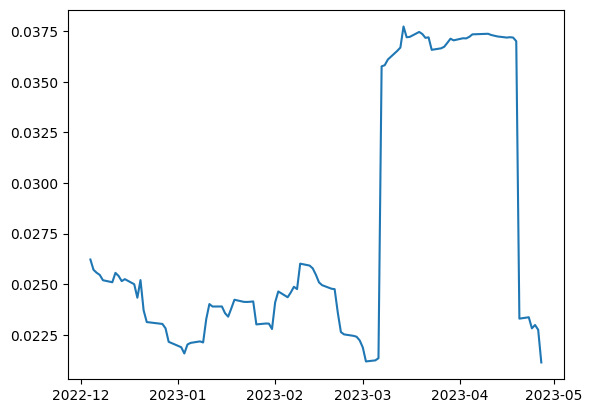

In [283]:
plt.plot(test_df[test_df['Asset'] == 4295894669].iloc[-100:, 9])

In [299]:
tf.keras.backend.clear_session()
LSTM_1 = LSTM_Model_MS_II(train_df, test_df, '2006-01-01', '2022-12-31', features = 'm1', infer_train= False)

['vol_series_daily', 'vol_series_weekly', 'vol_series_monthly', 'V^YZ']
train_test_prep() function is done
prepare_test_train() is done
Running model_LSTM() is done
1/1 [==============================] - 0s 20ms/step


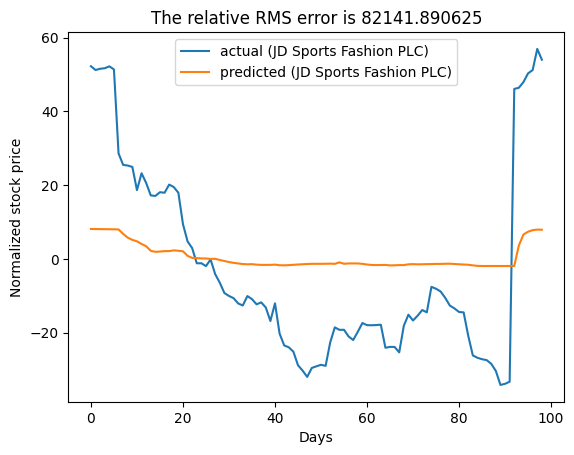

In [300]:
LSTM_1.full_workflow_and_plot()

In [288]:
test = [i for i in range(100)]

In [314]:
LSTM_1 = LSTM_Model_MS_II(train_df, test_df, '2006-01-01', '2022-12-31', features = 'm3', infer_train= False, naive=False, depth=3)

['buzz', 'ESG', 'ESGCombined', 'ESGControversies', 'EnvironmentalPillar', 'GovernancePillar', 'SocialPillar', 'Community', 'EnvironmentalInnovation', 'Management', 'ProductResponsibility', 'Shareholders', 'Workforce', 'V^YZ']
train_test_prep() function is done
prepare_test_train() is done
Running model_LSTM() is done
1/1 [==============================] - 0s 24ms/step


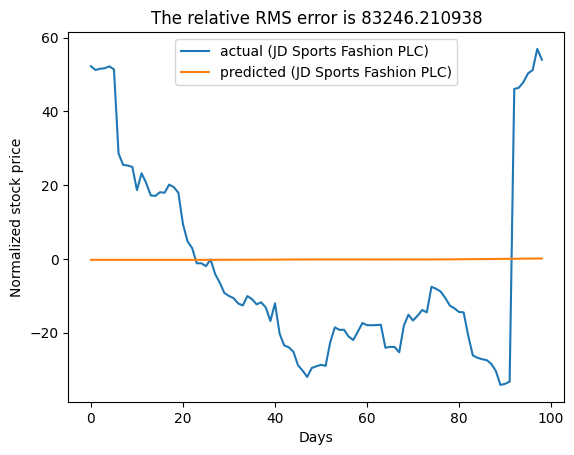

In [315]:
LSTM_1.full_workflow_and_plot()

In [220]:
something = ['JD Sports Fashion PLC', 'Entain PLC', 'Ocado Group PLC', 'Flutter Entertainment PLC', 'Berkeley Group Holdings PLC', 'TUI AG', 'Frasers Group PLC', 'Travis Perkins PLC', 'GKN Ltd', 'Burberry Group PLC', 'Currys PLC', 'Taylor Wimpey PLC', 'Barratt Developments P L C', 'Whitbread PLC', 'WPP PLC', 'ITV PLC', 'Sky Ltd', 'Kingfisher PLC', 'Next PLC', 'Compass Group PLC', 'Pearson PLC', 'InterContinental Hotels Group PLC', 'Home Retail Group Ltd', 'Persimmon PLC']

In [222]:
for i,  in enumerate(something):
    print(i,)

ValueError: too many values to unpack (expected 1)

In [72]:
len(LSTM_1.train_test_prep())

24

In [ ]:
LSTM_1.

In [44]:
reshape_entity = np.array([i for i in range(180)])


In [45]:
reshaped_entity = np.reshape(reshape_entity, (60, 3))


In [46]:
reshaped_entity

array([[  0,   1,   2],
       [  3,   4,   5],
       [  6,   7,   8],
       [  9,  10,  11],
       [ 12,  13,  14],
       [ 15,  16,  17],
       [ 18,  19,  20],
       [ 21,  22,  23],
       [ 24,  25,  26],
       [ 27,  28,  29],
       [ 30,  31,  32],
       [ 33,  34,  35],
       [ 36,  37,  38],
       [ 39,  40,  41],
       [ 42,  43,  44],
       [ 45,  46,  47],
       [ 48,  49,  50],
       [ 51,  52,  53],
       [ 54,  55,  56],
       [ 57,  58,  59],
       [ 60,  61,  62],
       [ 63,  64,  65],
       [ 66,  67,  68],
       [ 69,  70,  71],
       [ 72,  73,  74],
       [ 75,  76,  77],
       [ 78,  79,  80],
       [ 81,  82,  83],
       [ 84,  85,  86],
       [ 87,  88,  89],
       [ 90,  91,  92],
       [ 93,  94,  95],
       [ 96,  97,  98],
       [ 99, 100, 101],
       [102, 103, 104],
       [105, 106, 107],
       [108, 109, 110],
       [111, 112, 113],
       [114, 115, 116],
       [117, 118, 119],
       [120, 121, 122],
       [123, 124

In [ ]:
np.reshape(reshape_entity, (60, 1))